# ML Project - Task 2: Data Cleaning, Pre-processing & EDA

## 1. Setup & Recap

### Q1: Import libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder , RobustScaler



### Q2: Load & Drop Duplicates & recreate `age_years` from `age`


In [16]:
df = pd.read_csv('cardio_train.csv', sep=';')
df.drop_duplicates(inplace=True)
df['age_years'] = (df['age'] / 365.25).round(1)
print("Data Loaded. Shape: " ,df.shape)

Data Loaded. Shape:  (70000, 14)


## 2. Handling Outliers: Blood Pressure

In [17]:
print(df['ap_hi'].max())
print(df['ap_hi'].min())
print(df['ap_lo'].max())
print(df['ap_lo'].min())

16020
-150
11000
-70


### Q3: BP Boxplots

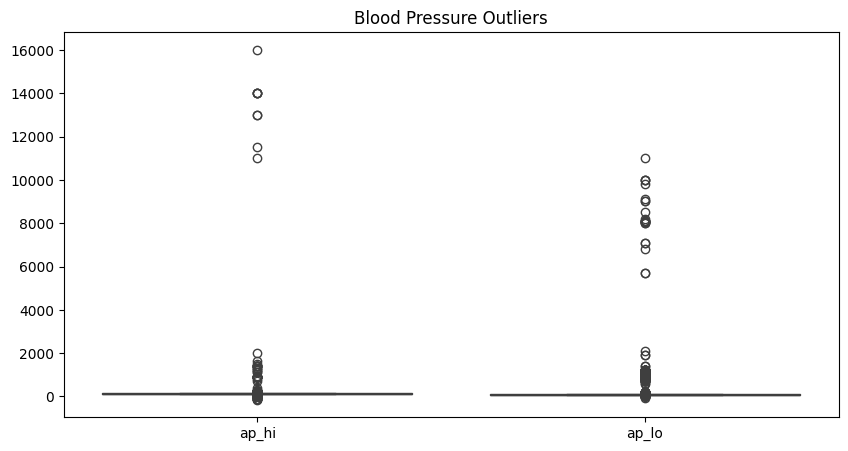

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['ap_hi', 'ap_lo']])
plt.title("Blood Pressure Outliers")
plt.show()

### Q4: Filter BP Ranges
- Keep `ap_hi` between 60 and 240
- Keep `ap_lo` between 30 and 190

In [19]:
df_clean = df[(df['ap_hi'] >= 60) & (df['ap_hi'] <= 240)]
df_clean = df_clean[(df_clean['ap_lo'] >= 30) & (df_clean['ap_lo'] <= 160)]
print(f"Shape after BP cleaning: {df_clean.shape}")

Shape after BP cleaning: (68769, 14)


## 3. Handling Outliers: Height & Weight

In [20]:
print(df['height'].max())
print(df['height'].min())
print(df['weight'].max())
print(df['weight'].min())

250
55
200.0
10.0


### Q6: Height/Weight Boxplots

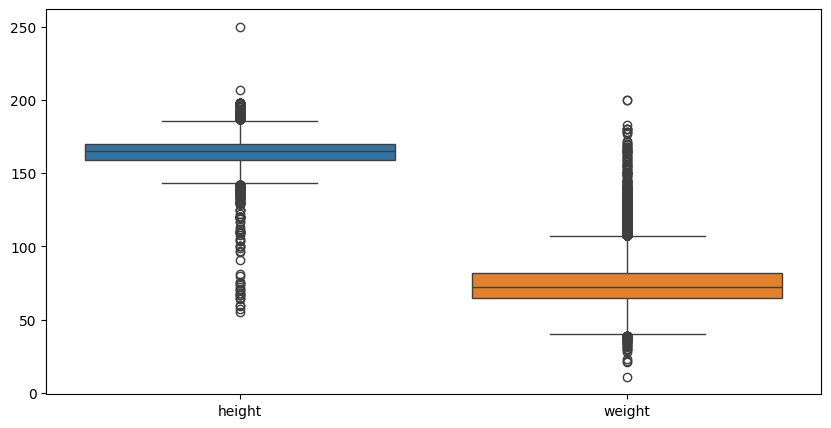

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_clean[['height', 'weight']])
plt.show()

### Q7: Filter H/W.
keep `height` between 100 and 230 cm, `weight` between 30 and 200 kg.

In [22]:
df_clean = df_clean[(df_clean['height'] >= 100) & (df_clean['height'] <= 230)]
df_clean = df_clean[(df_clean['weight'] >= 30) & (df_clean['weight'] <= 200)]
print("Shape after H/W cleaning:", (df_clean).shape)

Shape after H/W cleaning: (68736, 14)


## 4. Feature Engineering

### Q8: Create a new feature `bmi` (Body Mass Index).
BMI Calculation

In [23]:
df_clean['bmi'] = df_clean['weight'] / ((df_clean['height'] / 100) ** 2)
df_clean['bmi'] = df_clean['bmi'].round(2)
df_clean[['height', 'weight', 'bmi']].head()

,height,weight,bmi
0,168,62.0,21.97
1,156,85.0,34.93
2,165,64.0,23.51
3,169,82.0,28.71
4,156,56.0,23.01


<Axes: ylabel='bmi'>

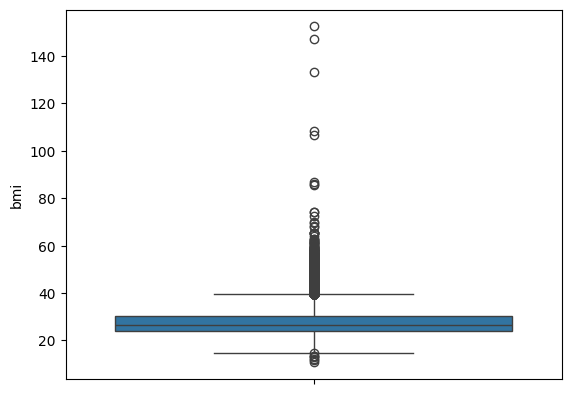

In [24]:
sns.boxplot(data=df_clean['bmi'])

In [25]:
df_clean = df_clean[df_clean['bmi'] < 120]
print("Shape after H/W cleaning:", (df_clean).shape)
(df_clean['bmi'] > 120).sum()

Shape after H/W cleaning: (68733, 15)


np.int64(0)

### Q9: BMI Categories
BMI:- Underweight (< 18.5) | 
      Normal (18.5 - 24.9) | 
      Overweight (25 - 29.9) | 
      Obese (>= 30)

In [26]:
def bmi_cat(bmi):
    if bmi < 18.5: 
        return 1
    elif 18.5 <= bmi < 25: 
        return 2
    elif 25 <= bmi < 30: 
        return 3
    else: 
        return 4

df_clean['bmi_cat'] = df_clean['bmi'].apply(bmi_cat)
df_clean['bmi_cat'].value_counts()

bmi_cat
2    25322
3    24754
4    18027
1      630
Name: count, dtype: int64

### Q10:Correlation Heatmap
Identify which features have the strongest correlation with `cardio`.

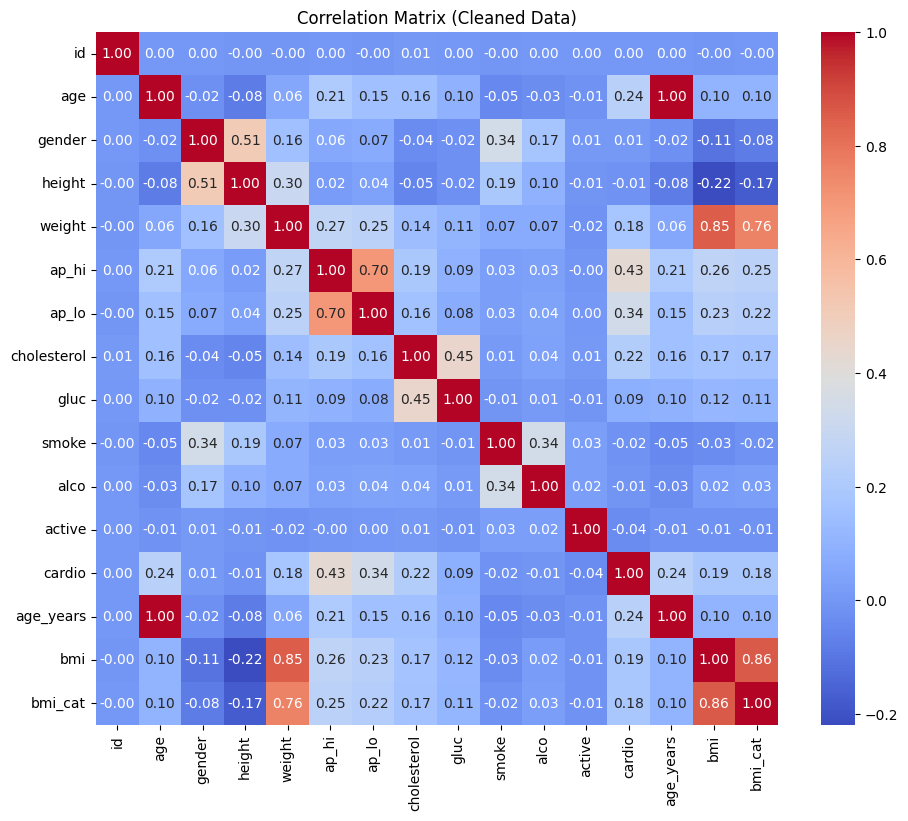

In [27]:
plt.figure(figsize=(11, 9))
numeric_df = df_clean.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix (Cleaned Data)")
plt.show()

### Q11: countplot of `cardio` across `gender`.

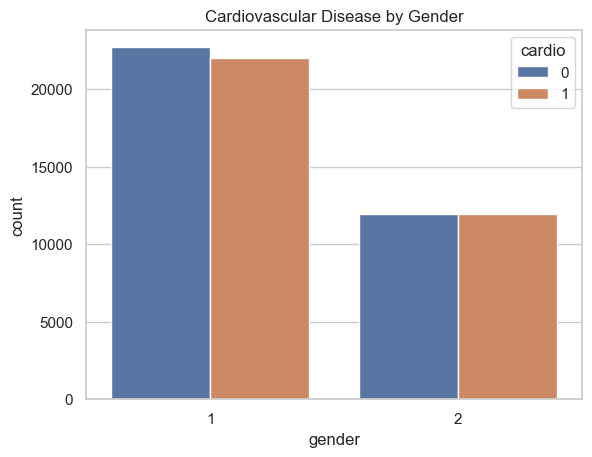

In [17]:
sns.countplot(x='gender', hue='cardio', data=df_clean)
plt.title("Cardiovascular Disease by Gender")
plt.show()

### Q12: violin plot or box plot of `bmi` .


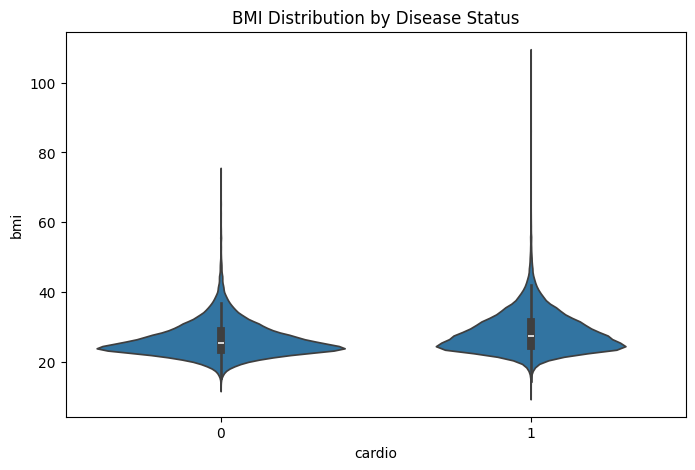

In [28]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='cardio', y='bmi', data=df_clean)
plt.title("BMI Distribution by Disease Status")
plt.show()

### Q13: Age KDE Plot

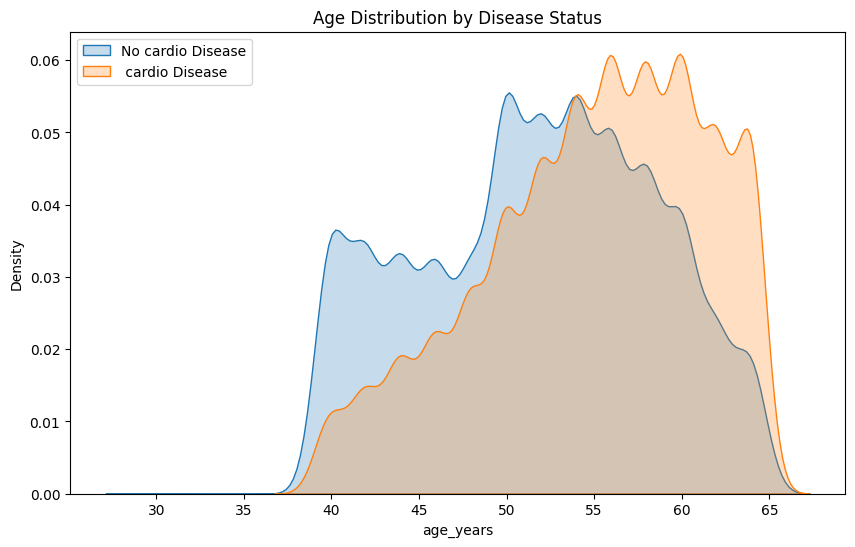

In [29]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_clean[df_clean['cardio'] == 0]['age_years'], label='No cardio Disease', fill=True)
sns.kdeplot(df_clean[df_clean['cardio'] == 1]['age_years'], label=' cardio Disease', fill=True)
plt.title("Age Distribution by Disease Status")
plt.legend()
plt.show()


### Q14: bar plots for relationship between `smoke`, `alco` and `cardio`.

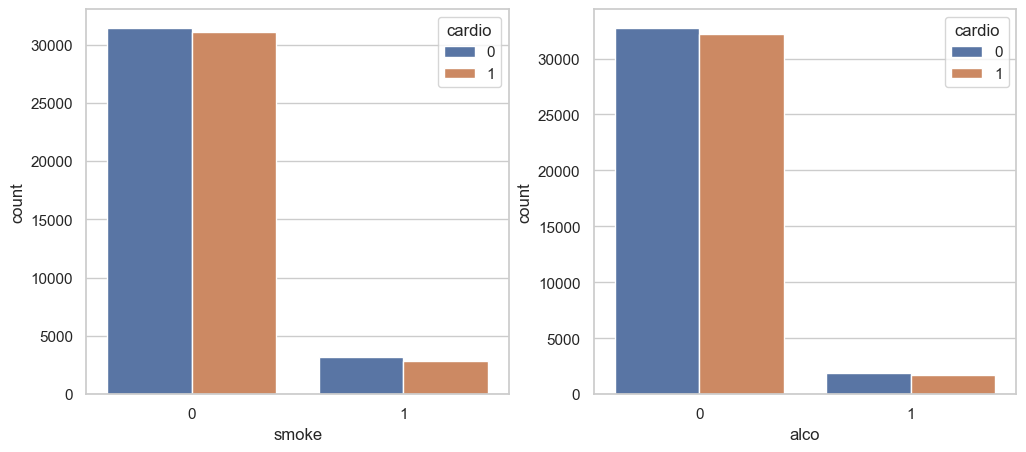

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='smoke', hue='cardio', data=df_clean, ax=axes[0])
sns.countplot(x='alco', hue='cardio', data=df_clean, ax=axes[1])
plt.show()

## 7. Normalization / Scaling

### Q15: Initialize a scaler `StandardScaler` or `RobustScaler`

In [30]:
scaler = StandardScaler()
# scaler = RobustScaler()

### Q16: Select numerical columns 

In [31]:

cols_to_scale = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi' , 'age_years']

### Q17 : Perform Scaling

In [32]:
df_scaled = df_clean.copy()
df_scaled[cols_to_scale] = scaler.fit_transform(df_clean[cols_to_scale])

In [33]:
df_scaled[cols_to_scale].describe().round(2)

,age,height,weight,ap_hi,ap_lo,bmi,age_years
count,68733.00,68733.00,68733.00,68733.00,68733.00,68733.00,68733.00
mean,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.51,-8.08,-3.09,-3.98,-5.35,-3.16,-3.51
25%,-0.73,-0.68,-0.64,-0.39,-0.14,-0.68,-0.74
50%,0.10,0.08,-0.15,-0.39,-0.14,-0.21,0.09
75%,0.75,0.70,0.55,0.80,0.90,0.50,0.76
max,1.72,5.35,8.81,6.77,8.19,15.24,1.72


In [34]:
if 'bmi_class' in df_scaled.columns:
    df_scaled = df_scaled.drop(columns=['bmi_class'])

df_scaled.to_csv('cardio_cleaned.csv', index=False)
print("File saved successfully.")

File saved successfully.
